<a href="https://colab.research.google.com/github/modabbir24/hello-world/blob/master/Grade_Prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_excel("data.xlsx")
data.head()

,Timestamp,Survey taken by(CnA Member),Sex,Branch,Dropper?,10th Board,12th Board,Coaching,Coaching City,Coaching Name,Home State,Home City,Family Size,Mom's Education,Dad's Education,Mom's Job,Dad's Job,Study Time?,Which Technical Clubs are you part of ?,Which Cultural Clubs are you part of?,Member of Fests' organizing team?,Hostel?,"At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)",Have you taken an educational loan?,"Time spent outside your room[except classes]? (daily average, in hours)",Attendance?,Relationship status?,"Time spent per day in gaming, tvseries, movies, other leisure activities ?(hours)",Library?,When do you sleep?,Sleep Duration(Hrs)?,Do you sleep during the day?,Addiction?,Relation with TA ? (on the scale of 1 to 5),Lab taken seriously,Tut taken seriously,Quiz taken seriously,Midsem taken seriously,Endsem taken seriously,Aiming for branch change,Attention Level(During Lectures),Group Study/Individual,Study Material Preferred,Interest in branch?,Core/Non-Core,CPI
0,2020-02-09 08:37:09.442,NaN,Male,ME,No,CBSE,CBSE,Yes,Patna,Mentors Eduserv,Bihar,Patna,4,Graduate,Post Graduate,Govt,Business,Irregular,1,1,None,Lohit,0.5,Yes,2.0,Above 90?,Single,3.0,During Exams,After 12 pm,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-09 17:30:40.861,Samarth,Male,BSBE,No,CBSE,CBSE,No,NaN,NaN,Rajasthan,Bikaner,9,Post Graduate,Post Graduate,Housewife,Business,Irregular,"CnA, Quiz club",Debsoc,Techniche,Umiam,6-7,No,12.0,Below 90?,Single,2.0,During Exams,After 12 am,7,No,NaN,4,4.0,3.0,5.0,5.0,5.0,2.0,1.0,Individual,Online content,3.0,Non-Core,7.56
2,2020-02-09 17:32:07.255,Maneshwar Singh,Male,BSBE,No,CBSE,State,Yes,Indore,Allen,Madhya Pradesh,Maheshwar,6,Graduate,Post Graduate,Housewife,Govt,Everyday upto 2-4 hours,"CnA, Aero",NaN,NaN,Kapili,5 to 6,No,4.0,Above 90?,Single,1.0,Rarely,After 12 am,6,No,NaN,4,4.0,3.0,4.0,5.0,5.0,4.0,3.0,Individual,Online content,4.0,Core,7.40
3,2020-02-09 17:33:04.822,NaN,Male,CL,No,CBSE,CBSE,Yes,patna,vmc,bihar,sasaram,4,10th Pass,Graduate,Housewife,Business,NaN,CnA,NaN,Techniche,Brahmaputra,3,Yes,2.0,Below 90?,Single,1.0,Rarely,After 12 am,7,No,NaN,4,4.0,3.0,5.0,5.0,5.0,2.0,4.0,Group Study,Online content,4.0,Non-Core,7.20
4,2020-02-09 17:38:39.098,NaN,Male,CL,No,CBSE,CBSE,Yes,patna,vmc,bihar,sasaram,4,10th Pass,Graduate,Housewife,Business,NaN,CnA,NaN,Techniche,Brahmaputra,3,Yes,2.0,Below 90?,Single,1.0,Rarely,After 12 am,7,No,NaN,4,4.0,3.0,5.0,5.0,5.0,2.0,4.0,Group Study,Online content,4.0,Non-Core,7.20


In [5]:
data['CPI '].describe()

count    311.000000
mean       7.736019
std        1.222124
min        1.700000
25%        7.000000
50%        7.800000
75%        8.505000
max       10.000000
Name: CPI , dtype: float64

In [0]:
data.drop(data.index[0], inplace = True)

In [0]:
data.drop(['Timestamp', 'Survey taken by(CnA Member)'],axis=1,inplace = True)

In [0]:
pd.set_option('display.max_columns', 500)

In [9]:
data

,Sex,Branch,Dropper?,10th Board,12th Board,Coaching,Coaching City,Coaching Name,Home State,Home City,Family Size,Mom's Education,Dad's Education,Mom's Job,Dad's Job,Study Time?,Which Technical Clubs are you part of ?,Which Cultural Clubs are you part of?,Member of Fests' organizing team?,Hostel?,"At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)",Have you taken an educational loan?,"Time spent outside your room[except classes]? (daily average, in hours)",Attendance?,Relationship status?,"Time spent per day in gaming, tvseries, movies, other leisure activities ?(hours)",Library?,When do you sleep?,Sleep Duration(Hrs)?,Do you sleep during the day?,Addiction?,Relation with TA ? (on the scale of 1 to 5),Lab taken seriously,Tut taken seriously,Quiz taken seriously,Midsem taken seriously,Endsem taken seriously,Aiming for branch change,Attention Level(During Lectures),Group Study/Individual,Study Material Preferred,Interest in branch?,Core/Non-Core,CPI
1,Male,BSBE,No,CBSE,CBSE,No,NaN,NaN,Rajasthan,Bikaner,9,Post Graduate,Post Graduate,Housewife,Business,Irregular,"CnA, Quiz club",Debsoc,Techniche,Umiam,6-7,No,12.0,Below 90?,Single,2.0,During Exams,After 12 am,7,No,NaN,4,4.0,3.0,5.0,5.0,5.0,2.0,1.0,Individual,Online content,3.0,Non-Core,7.56
2,Male,BSBE,No,CBSE,State,Yes,Indore,Allen,Madhya Pradesh,Maheshwar,6,Graduate,Post Graduate,Housewife,Govt,Everyday upto 2-4 hours,"CnA, Aero",NaN,NaN,Kapili,5 to 6,No,4.0,Above 90?,Single,1.0,Rarely,After 12 am,6,No,NaN,4,4.0,3.0,4.0,5.0,5.0,4.0,3.0,Individual,Online content,4.0,Core,7.40
3,Male,CL,No,CBSE,CBSE,Yes,patna,vmc,bihar,sasaram,4,10th Pass,Graduate,Housewife,Business,NaN,CnA,NaN,Techniche,Brahmaputra,3,Yes,2.0,Below 90?,Single,1.0,Rarely,After 12 am,7,No,NaN,4,4.0,3.0,5.0,5.0,5.0,2.0,4.0,Group Study,Online content,4.0,Non-Core,7.20
4,Male,CL,No,CBSE,CBSE,Yes,patna,vmc,bihar,sasaram,4,10th Pass,Graduate,Housewife,Business,NaN,CnA,NaN,Techniche,Brahmaputra,3,Yes,2.0,Below 90?,Single,1.0,Rarely,After 12 am,7,No,NaN,4,4.0,3.0,5.0,5.0,5.0,2.0,4.0,Group Study,Online content,4.0,Non-Core,7.20
5,Male,ME,No,CBSE,CBSE,Yes,Kottayam,T.I.M.E,Maharashtra,Yavatmal,5,10th Pass,12th Pass,Housewife,Else,Everyday upto 0-2 hours,Robotics,NaN,NaN,Brahmaputra,1hour,Yes,3.0,Above 90?,Single,1.0,During Exams,After 10 pm,7,No,NaN,5,5.0,4.0,4.0,5.0,5.0,3.0,5.0,Group Study,Books,4.0,Non-Core,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Male,BSBE,No,CBSE,State,Yes,Pune,PACE Institute,Maharashtra,Pune,4,Graduate,Post Graduate,Medical,Medical,Everyday upto 0-2 hours,FEC,Cadence,Techniche,Kapili,5-6,No,1.0,Above 90?,Committed,2.0,During Exams,After 12 am,6,Yes,NaN,3,5.0,4.0,4.0,5.0,5.0,3.0,4.0,Individual,Books,4.0,Core,8.20
309,Male,CE,No,CBSE,CBSE,Yes,Guwahati,Resonance,Assam,Guwahati,4,Graduate,Graduate,Govt,Govt,Everyday upto 0-2 hours,Coding Club,NaN,"Techniche, Alcher",Kapili,0,Yes,1.0,Below 90?,Single,2.0,Rarely,After 12 am,6,No,NaN,2,5.0,4.0,5.0,5.0,5.0,1.0,3.0,Individual,Books,3.0,Non-Core,6.79
310,Male,CSE,No,State,State,No,Rajahmundry,Sri chaitanya,Andhra Pradesh,Rajahmundry,4,Post Graduate,Post Graduate,Govt,Govt,Irregular,NaN,NaN,Udgam,Kapili,5-6,No,4.0,Below 90?,Committed,3.0,Rarely,After 10 pm,7,Yes,NaN,3,3.0,2.0,2.0,3.0,5.0,1.0,1.0,Group Study,Online content,5.0,Core,6.30
311,Male,BSBE,Yes,CBSE,State,Yes,Kota,Resonance,Rajasthan,Kuchaman city,5,<10th Pass,Post Graduate,Housewife,Govt,Irregular,"FEC, Aero",NaN,Alcher,Kapili,7,Yes,5.0,Below 90?,Complicated,5.0,During Exams,After 2 am,5,No,"Drinking, Smoking, Weed",3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Group Study,Online content,1.0,Non-Core,5.30


In [10]:
data.isna().sum()

Sex                                                                                    0
Branch                                                                                 0
Dropper?                                                                               0
10th Board                                                                             0
12th Board                                                                             0
Coaching                                                                               0
Coaching City                                                                          4
Coaching Name                                                                          5
Home State                                                                             0
Home City                                                                              0
Family Size                                                                            0
Mom's Education      

In [0]:
#Finding numerical Features

numeric_data = data.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = data.select_dtypes(exclude = np.number)


In [12]:
list(categorial_data)

['Sex',
 'Branch',
 'Dropper?',
 '10th Board',
 '12th Board',
 'Coaching ',
 'Coaching City',
 'Coaching Name',
 'Home State',
 'Home City',
 "Mom's Education",
 "Dad's Education",
 "Mom's Job",
 "Dad's Job",
 'Study Time?',
 'Which Technical Clubs are you part of ?',
 'Which Cultural Clubs are you part of?',
 "Member of Fests' organizing team?",
 'Hostel?',
 'At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)',
 'Have you taken an educational loan? ',
 'Attendance?',
 'Relationship status?',
 'Library?',
 'When do you sleep?',
 'Sleep Duration(Hrs)?',
 'Do you sleep during the day?',
 'Addiction?',
 'Group Study/Individual ',
 'Study Material Preferred',
 'Core/Non-Core']

## SEX

In [13]:
data['Sex'].unique()


array(['Male', 'Female'], dtype=object)

In [0]:
data.Sex.replace({'Male':1, 'Female':2}, inplace= True)

In [15]:
data.Sex.unique()

array([1, 2])

In [0]:
#Branch
data.Branch.replace({'BSBE':1,'CL':2,'ME':3,'CSE':4,'CE':5,'EP':6,'MC':7,'CST':8,'ECE/EEE':9,'Design':0},inplace=True)


In [17]:
data.Branch.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [0]:
# dropper
data['Dropper?'].replace({'No': 0, 'Yes':1}, inplace=True)

In [0]:
# 10th nd 12th board

data['10th Board'].replace({'CBSE':1,'ICSE':2,'State':3},inplace=True)
data['12th Board'].replace({'CBSE':1,'ICSE':2,'State':3},inplace=True)

In [0]:
# coaching

data['Coaching '].replace({'No': 0, 'Yes':1}, inplace=True)

In [21]:
data["Mom's Education"].unique()

array(['Post Graduate', 'Graduate', '10th Pass', nan, '12th Pass',
       '<10th Pass'], dtype=object)

In [0]:
data["Dad's Education"].dropna(inplace = True)

In [0]:
data['Dad\'s Education'].replace({'Post Graduate':1,'Graduate':2,'10th Pass':3,'12th Pass':4,'< 10th Pass':5},inplace= True)

In [24]:
data['Dad\'s Education'].unique()

array([1, 2, 4, 3, 5])

In [25]:
#mom nd dad job
data["Mom's Job"].dropna(inplace = True)
data["Dad's Job"].dropna(inplace = True)
data['Mom\'s Job'].unique()


array(['Housewife', 'Govt', 'Medical', 'Else', 'Management & Finance',
       'Technical', 'Business', 'Artist', 'Law'], dtype=object)

In [0]:
data['Mom\'s Job'].replace({'Housewife':1,'Govt':2,'Medical':3,'Management & Finance':4,'Technical':5,'Business':6,'Artist':7, 'Law':8,'Else':0},inplace=True)

In [27]:
data['Mom\'s Job'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [28]:
data['Dad\'s Job'].unique()

array(['Business', 'Govt', 'Else', 'Medical', 'Management & Finance',
       'Technical', 'Law', 'Artist'], dtype=object)

In [0]:
data['Dad\'s Job'].replace({'Business':1, 'Govt':2, 'Else':0, 'Medical':3, 'Management & Finance':4,
       'Technical':5, 'Law':6, 'Artist':7},inplace=True)

In [30]:
data['Dad\'s Job'].unique()

array([1, 2, 0, 3, 4, 5, 6, 7])

In [0]:
data['Study Time?'].fillna('Irregular', inplace=True)

In [32]:
data['Study Time?'].unique()

array(['Irregular', 'Everyday upto 2-4 hours', 'Everyday upto 0-2 hours'],
      dtype=object)

In [0]:
data['Study Time?'].replace({'Irregular':0, 'Everyday upto 2-4 hours':2, 'Everyday upto 0-2 hours':1},inplace=True)

In [34]:
data['Study Time?'].unique()

array([0, 2, 1])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 1 to 312
Data columns (total 44 columns):
Sex                                                                                  312 non-null int64
Branch                                                                               312 non-null int64
Dropper?                                                                             312 non-null int64
10th Board                                                                           312 non-null int64
12th Board                                                                           312 non-null int64
Coaching                                                                             312 non-null int64
Coaching City                                                                        308 non-null object
Coaching Name                                                                        307 non-null object
Home State                                                   

In [36]:
data['Have you taken an educational loan? '].unique()

array(['No', 'Yes'], dtype=object)

In [0]:
data['Have you taken an educational loan? '].replace({'Yes':1,'No':0},inplace=True)

In [38]:
data['Attendance?'].unique()

array(['Below 90?', 'Above 90?', 'Below 75?', 'Below 50?'], dtype=object)

In [0]:
data['Attendance?'].replace({'Below 90?':3, 'Above 90?':4, 'Below 75?':2, 'Below 50?':1},inplace=True)

In [40]:
list(categorial_data)

['Sex',
 'Branch',
 'Dropper?',
 '10th Board',
 '12th Board',
 'Coaching ',
 'Coaching City',
 'Coaching Name',
 'Home State',
 'Home City',
 "Mom's Education",
 "Dad's Education",
 "Mom's Job",
 "Dad's Job",
 'Study Time?',
 'Which Technical Clubs are you part of ?',
 'Which Cultural Clubs are you part of?',
 "Member of Fests' organizing team?",
 'Hostel?',
 'At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)',
 'Have you taken an educational loan? ',
 'Attendance?',
 'Relationship status?',
 'Library?',
 'When do you sleep?',
 'Sleep Duration(Hrs)?',
 'Do you sleep during the day?',
 'Addiction?',
 'Group Study/Individual ',
 'Study Material Preferred',
 'Core/Non-Core']

In [41]:
data['Relationship status?'].unique()

array(['Single', 'Complicated', 'Committed'], dtype=object)

In [0]:
data['Relationship status?'].replace({'Single':1, 'Complicated':2, 'Committed':3},inplace=True)

In [43]:
data['Library?'].unique()

array(['During Exams', 'Rarely', 'Often'], dtype=object)

In [0]:
data['Library?'].replace({'During Exams':2, 'Rarely':0, 'Often':1},inplace=True)

In [45]:
data['When do you sleep?'].unique()

array(['After 12 am', 'After 10 pm', 'After 2 am', 'Before 10 pm', 3,
       'Around 1', 'Never', '6:30 am', 'Around 12'], dtype=object)

In [0]:
data['When do you sleep?'].replace({'Never':'After 12 am'},inplace = True)

In [0]:
data['When do you sleep?'].replace({'After 12 am':12, 'After 10 pm':10, 'After 2 am':2, 'Before 10 pm':10,'Around 1':1, '6:30 am':6, 'Around 12':11},inplace = True)

In [48]:
data['When do you sleep?'].unique()

array([12, 10,  2,  3,  1,  6, 11])

In [49]:
data['Sleep Duration(Hrs)?'].unique()

array([7, 6, 5, '<=4', '>=8'], dtype=object)

In [0]:
data['Sleep Duration(Hrs)?'].replace({'<=4':4,'>=8':8},inplace=True)

In [51]:
data['Do you sleep during the day?'].unique()

array(['No', 'Yes'], dtype=object)

In [0]:
data['Do you sleep during the day?'].replace({'No':0,'Yes':1},inplace=True)

In [53]:
data['Group Study/Individual '].unique()

array(['Individual', 'Group Study'], dtype=object)

In [0]:
data['Group Study/Individual '].replace({'Individual':1, 'Group Study':2},inplace= True)

In [55]:
data['Study Material Preferred'].unique()

array(['Online content', 'Books'], dtype=object)

In [0]:
data['Study Material Preferred'].replace({'Online content':1, 'Books':2},inplace=True)

In [57]:
data['Core/Non-Core'].unique()

array(['Non-Core', 'Core'], dtype=object)

In [0]:
data['Core/Non-Core'].replace({'Non-Core':2, 'Core':1},inplace=True)

In [0]:
categorial_data = data.select_dtypes(exclude = np.number)

In [60]:
categorial_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 1 to 312
Data columns (total 11 columns):
Coaching City                                                                308 non-null object
Coaching Name                                                                307 non-null object
Home State                                                                   312 non-null object
Home City                                                                    312 non-null object
Mom's Education                                                              311 non-null object
Which Technical Clubs are you part of ?                                      223 non-null object
Which Cultural Clubs are you part of?                                        96 non-null object
Member of Fests' organizing team?                                            231 non-null object
Hostel?                                                                      312 non-null object
At the time of Spardha/

In [61]:
data['Mom\'s Education'].unique()

array(['Post Graduate', 'Graduate', '10th Pass', nan, '12th Pass',
       '<10th Pass'], dtype=object)

In [0]:
#Finding numerical Features

numeric_data = data.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = data.select_dtypes(exclude = np.number)


In [63]:
list(categorial_data)

['Coaching City',
 'Coaching Name',
 'Home State',
 'Home City',
 "Mom's Education",
 'Which Technical Clubs are you part of ?',
 'Which Cultural Clubs are you part of?',
 "Member of Fests' organizing team?",
 'Hostel?',
 'At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)',
 'Addiction?']

In [64]:
data['Study Time?'].unique()

array([0, 2, 1])

In [65]:
data['Hostel?'].unique()

array(['Umiam', 'Kapili', 'Brahmaputra', 'Dhansiri', 'Lohit', 'Barak',
       'DIhing', 'Kameng', 'Manas', 'Siang'], dtype=object)

In [0]:
data['Hostel?'].replace({'Umiam':0, 'Kapili':1, 'Brahmaputra':2, 'Dhansiri':3, 'Lohit':4, 'Barak':5,'DIhing':6, 'Kameng':7, 'Manas':8, 'Siang':9},inplace=True)

## Club and fest

In [0]:
data['Which Technical Clubs are you part of ?'].fillna('0', inplace = True)
data["Member of Fests' organizing team?"].fillna('0',inplace = True)


In [0]:
def club_dets(club_str):
  bus = 0;
  hard = 0;
  tech = 0;
  oth = 0;

  if ('CnA' in club_str):
    bus+=1
  if('FEC' in club_str):
    bus+=1
  if('Aero' in club_str):
    hard+=1
  if('Robotics' in club_str):
    hard+=1
  if('Electronics' in club_str):
    hard+=1
  if('Coding Club' in club_str):
    tech+=1
  if('Prakriti' in club_str):
    tech+=1
  if('Automobile Club' in club_str):
    oth+=1
  if('Equinox' in club_str):
    oth+=1
  if('Quiz Club' in club_str):
    oth+=1
  if('SWC' in club_str):
    tech+=1
  if('EDC' in club_str):
    bus+=1

  return [bus,hard,tech,oth]

    




In [0]:
def fest_dets(fest_str):
  tech = 0;
  alch = 0;
  chugm = 0;
  oth = 0;

  if ('Techniche' in fest_str):
    tech+=1
  if('Alcher' in fest_str):
    alch+=1
  if('Udgam' in fest_str):
    chugm+=1
  if('Others' in fest_str):
    oth+=1


  return [tech,alch,chugm,oth]

    




In [0]:
data['Tech_Clubs'] = data['Which Technical Clubs are you part of ?'].apply(club_dets)

In [0]:
data[['bus','hard','tech','other_tech']] = pd.DataFrame(data['Tech_Clubs'].values.tolist(), index=data.index)

In [72]:
data['Tech_Clubs']

1      [1, 0, 0, 0]
2      [1, 1, 0, 0]
3      [1, 0, 0, 0]
4      [1, 0, 0, 0]
5      [0, 1, 0, 0]
           ...     
308    [1, 0, 0, 0]
309    [0, 0, 1, 0]
310    [0, 0, 0, 0]
311    [1, 1, 0, 0]
312    [0, 1, 1, 0]
Name: Tech_Clubs, Length: 312, dtype: object

In [0]:
data['Fests'] = data["Member of Fests' organizing team?"].apply(fest_dets)

In [0]:
data[['techniche','alcher','chugm','other_fest']] = pd.DataFrame(data['Fests'].values.tolist(), index=data.index)

<BarContainer object of 2 artists>

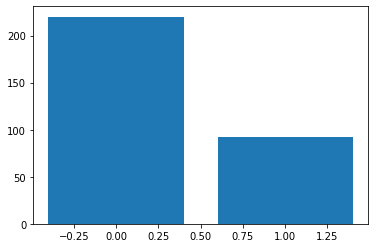

In [75]:
plt.bar(data['Dropper?'].unique(),data['Dropper?'].value_counts())

<BarContainer object of 2 artists>

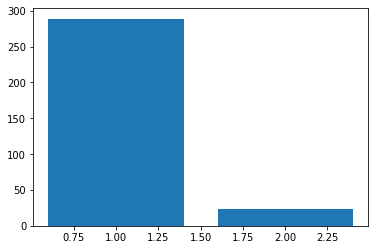

In [76]:
plt.bar(data['Sex'].unique(),data['Sex'].value_counts())

<BarContainer object of 10 artists>

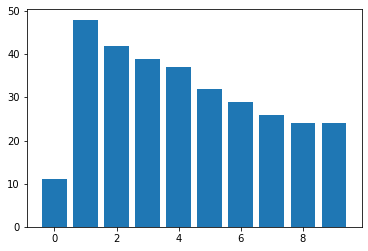

In [77]:
plt.bar(data['Branch'].unique(),data['Branch'].value_counts())

<BarContainer object of 3 artists>

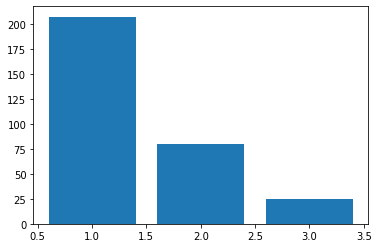

In [78]:
plt.bar(data['10th Board'].unique(),data['10th Board'].value_counts())

<BarContainer object of 3 artists>

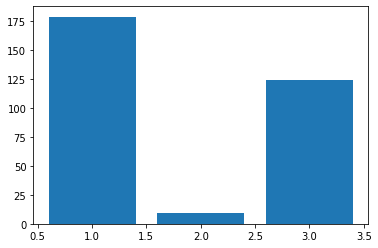

In [79]:
plt.bar(data['12th Board'].unique(),data['12th Board'].value_counts())

In [0]:
# mom nd dad edu
data["Mom's Education"].dropna(inplace = True)

In [0]:
# mom nd dad edu
data["Mom's Education"].replace({'Post Graduate':1,'Graduate':2,'10th Pass':3,'12th Pass':4,'<10th Pass':5},inplace= True)

In [164]:
data["Mom's Education"].unique()

array([2, 1, 4, 5, 3, 0])

<BarContainer object of 5 artists>

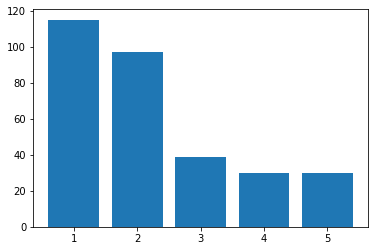

In [83]:
plt.bar(data["Mom's Education"].unique(),data["Mom's Education"].value_counts())

<BarContainer object of 5 artists>

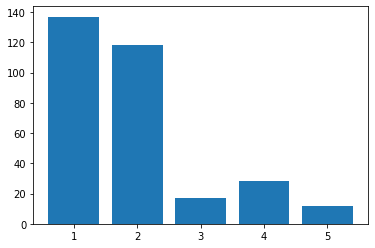

In [84]:
plt.bar(data["Dad's Education"].unique(),data["Dad's Education"].value_counts())

<BarContainer object of 9 artists>

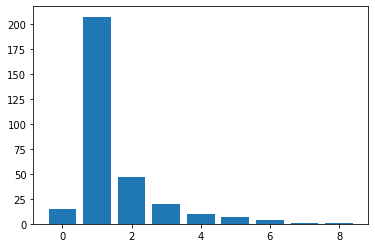

In [85]:
plt.bar(data["Mom's Job"].unique(),data["Mom's Job"].value_counts())

<BarContainer object of 8 artists>

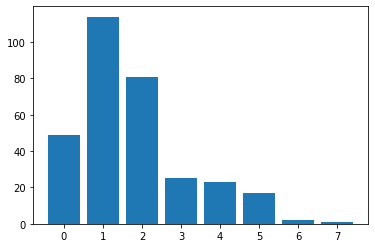

In [86]:
plt.bar(data["Dad's Job"].unique(),data["Dad's Job"].value_counts())

In [0]:
def plot_bar(coln):
  plt.bar(data[coln].unique(),data[coln].value_counts())



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa086370470>]],
      dtype=object)

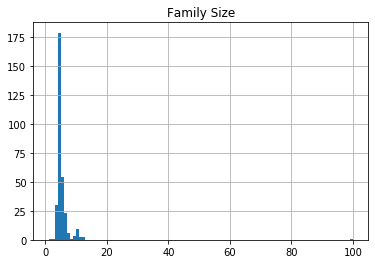

In [88]:
data.hist('Family Size',bins= 100)

In [0]:
def c_club_dets(club_str):
  octv = 0;
  cad =0;
  lit = 0;
  deb = 0;
  anr = 0;
  mont = 0;
  drama = 0;
  arts = 0;
  lum = 0;

  if('Octaves' in club_str):
    octv+=1
  if('Cadence' in club_str):
    cad+=1
  if('Litsoc' in club_str):
    lit+=1
  if('Debsoc' in club_str):
    deb+=1
  if('AnR' in club_str):
    anr+=1
  if('Drama club' in club_str):
    drama+=1
  if('Fine-Arts' in club_str):
    arts+=1
  if('Lumiere' in club_str):
    lum+=1
    
  return [cad,lit,deb,anr,mont,drama,arts,lum]


In [0]:
data['Which Cultural Clubs are you part of?'].fillna('0',inplace = True)

In [0]:
data['Cult_Clubs'] = data['Which Cultural Clubs are you part of?'].apply(c_club_dets)

In [0]:
data[['cad','lit','deb','anr','mont','drama','arts','lum']] = pd.DataFrame(data['Cult_Clubs'].values.tolist(), index=data.index)

## Cleaning of Home state 

In [93]:
data['Home State'].unique()

array(['Rajasthan', 'Madhya Pradesh', 'bihar', 'Maharashtra',
       'West Bengal', 'Gujarat', 'UP', 'Karnataka', 'Delhi', 'New Delhi',
       'Uttar Pradesh', 'Haryana', 'HARYANA', 'Uttarakhand',
       'Andhra pradesh', 'Uttar pradesh', 'Manipur', 'MAHARASHTRA',
       'Madhya pradesh', 'Andra pradesh', 'Punjab', 'Maharashtra ',
       'Jharkhand', 'TAMIL NADU', 'Telangana', 'Bihar', 'west bengal',
       'RAJASTHAN', 'tamil nadu', 'TamilNadu', 'Gujarat ', 'Rajasthan ',
       'PUNJAB', 'karnataka', 'Andhra and Telangana pradesh',
       'Maharshtra', 'Assam', 'Arunachal Pradesh', 'Tamilnadu',
       'Madhya pradesg', 'Mp', 'Bokaro', 'UTTAR PRADESH', 'Andra Pradesh',
       'Telangana ', 'Up', 'MP', 'Kerala', 'Chhattisgarh ',
       'Andhra Pradesh', 'Bhopal', 'Ap', 'West bengal', 'GUJARAT',
       'tamilnadu', 'Andhra prdesh', 'Karnataka ', 'rajasthan', 'M.P.',
       'Uttrakhand', 'BIHAR', 'haryana', 'manipur', 'maharashtra',
       'assam', 'uttar pradesh', 'M.P', 'kerala', 'Odish

In [0]:
data['Home State']=data['Home State'].str.lower().str.replace(' ','')

In [95]:
data['Home State'].unique()

array(['rajasthan', 'madhyapradesh', 'bihar', 'maharashtra', 'westbengal',
       'gujarat', 'up', 'karnataka', 'delhi', 'newdelhi', 'uttarpradesh',
       'haryana', 'uttarakhand', 'andhrapradesh', 'manipur',
       'andrapradesh', 'punjab', 'jharkhand', 'tamilnadu', 'telangana',
       'andhraandtelanganapradesh', 'maharshtra', 'assam',
       'arunachalpradesh', 'madhyapradesg', 'mp', 'bokaro', 'kerala',
       'chhattisgarh', 'bhopal', 'ap', 'andhraprdesh', 'm.p.',
       'uttrakhand', 'm.p', 'odisha', 'telanganastate', 'alwar',
       'andhrapradhesh', 'chandigarh', 'andamanandnicobarislands'],
      dtype=object)

In [0]:
data=data.sort_values(by='Home State')

In [97]:
data['Home State'].unique()

array(['alwar', 'andamanandnicobarislands', 'andhraandtelanganapradesh',
       'andhrapradesh', 'andhrapradhesh', 'andhraprdesh', 'andrapradesh',
       'ap', 'arunachalpradesh', 'assam', 'bhopal', 'bihar', 'bokaro',
       'chandigarh', 'chhattisgarh', 'delhi', 'gujarat', 'haryana',
       'jharkhand', 'karnataka', 'kerala', 'm.p', 'm.p.', 'madhyapradesg',
       'madhyapradesh', 'maharashtra', 'maharshtra', 'manipur', 'mp',
       'newdelhi', 'odisha', 'punjab', 'rajasthan', 'tamilnadu',
       'telangana', 'telanganastate', 'up', 'uttarakhand', 'uttarpradesh',
       'uttrakhand', 'westbengal'], dtype=object)

In [0]:
data['Home State']=data['Home State'].str.replace('newdelhi','delhi').replace('maharshtra','maharashtra').replace('uttarpradesh','up').replace('uttarakhand','uttrakhand')

In [0]:
data['Home State']=data['Home State'].str.replace('madhyapradesh|madhyaparadesh|madhyapradesg|m.p.|m.p|bhopal','mp')

In [0]:
data['Home State']=data['Home State'].str.replace('telanganastate','telangana').replace('bokaro','jharkhand').replace('alwar','rajasthan')

In [0]:
data['Home State']=data['Home State'].str.replace('andhrapradesh|andrapradesh|andhraandtelanganapradesh|andhraprdesh|andhrapradhesh','ap')

In [102]:
data['Home State'].unique()

array(['rajasthan', 'andamanandnicobarislands', 'ap', 'arunachalpradesh',
       'assam', 'mp', 'bihar', 'jharkhand', 'chandigarh', 'chhattisgarh',
       'delhi', 'gujarat', 'haryana', 'karnataka', 'kerala',
       'maharashtra', 'manipur', 'odisha', 'punjab', 'tamilnadu',
       'telangana', 'up', 'uttrakhand', 'westbengal'], dtype=object)

In [0]:
data['Home State'] =data['Home State'].astype('category').cat.codes

## Cleaning of Home City

In [104]:
data['Home City'].unique()

array(['Behror', 'Rangat', 'Hyderabad', 'Vizag', 'Visakhapatnam',
       'Kakinada', 'Vijayawada', 'Guntur', 'Amadalavalasa',
       'Sattenapalli', 'Kadapa', 'Tanuku', 'Rajahmundry', 'Kavali',
       'Palasa', 'Rajuhmundry', 'Pileru', 'Tadipatri', 'Nuzvid',
       'Itanagar', 'Guwahati', 'Jaipur', 'Hailakandi', 'Jorhat',
       'tinsukia', 'MP', 'Khagaria', 'Patna', 'Hajipur', 'Motihari ',
       'Bhojpur', 'hajipur', 'Forbesgang', 'Nawada', 'Sitamarhi',
       'Bettiah', 'sasaram', 'Motihari', 'Madhepura', 'Muzaffarpur',
       'Samastipur', 'biharsharif', 'Jehanabad', 'Bokaro', 'Chandigarh',
       'Korba', 'Raipur', 'Ambikapur', 'Raigarh', 'Delhi', 'New Delhi',
       'Chanakyapuri', 'Rohini', 'Mehsana', 'Ahmedabad', 'Vapi',
       'Jodhpur', 'Surat', 'Vadodara', 'Jamnagar', 'Ahmedabad ', 'Rohtak',
       'Bhiwani', 'Ballabgarh', 'Gurgaon', 'Hisar', 'Sonipat', 'Narnaul',
       'Gurugram', 'narnaul', 'Rewari', 'GURUGRAM', 'Ranchi',
       'Jamshedpur', 'Dhanbad', 'Godda', 'Ramgarh'

In [0]:
data=data.sort_values(by='Home City')

In [106]:
data['Home City'].unique()

array(['Abu road', 'Ahmedabad', 'Ahmedabad ', 'Ahmedpur', 'Ajmer',
       'Akbarpur', 'Allahabad', 'Alwar', 'Amadalavalasa', 'Ambikapur',
       'Amravati', 'Angul', 'Ashok nagar', 'Aurangabad', 'Balaghat',
       'Ballabgarh', 'Balotra', 'Bangalore', 'Bareilly', 'Barnala',
       'Barrackpore', 'Barwani', 'Beawar', 'Behror', 'Bengaluru',
       'Bettiah', 'Bhilwara', 'Bhiwani', 'Bhojpur', 'Bhopal',
       'Bhubaneshwar', 'Bikaner', 'Bokaro', 'Bundi', 'CHENNAI',
       'CHITTORGARH', 'Chanakyapuri', 'Chandigarh', 'Chandrapur',
       'Chhatarpur', 'Churachandpur', 'Dehradun', 'Delhi', 'Dhanbad',
       'Dhaulpur', 'Durgapur', 'Durgspur', 'Erode', 'Forbesgang',
       'GURUGRAM', 'Ghaziabad', 'Godda', 'Gorakhpur', 'Guna', 'Guntur',
       'Gurgaon', 'Gurugram', 'Guwahati', 'Gwalior', 'Hailakandi',
       'Hajipur', 'Haridwar', 'Hazaribag', 'Hindaun city', 'Hisar',
       'Howrah', 'Hyderabad', 'Hyderabad ', 'Indore', 'Itanagar',
       'JAIPUR', 'Jabalpur', 'Jaipur', 'Jamnagar', 'Jamshe

In [0]:
data['Home City']=data['Home City'].str.lower().str.replace(' ','')

In [0]:
data['Home City'].replace({'durgapur':'durgspur','mp':'bhopal','rajahmundry':'rajuhmundry','shahdol(mp)':'shahdol'},inplace = True)

In [109]:
data['Home City'].unique()

array(['aburoad', 'ahmedabad', 'ahmedpur', 'ajmer', 'akbarpur',
       'allahabad', 'alwar', 'amadalavalasa', 'ambikapur', 'amravati',
       'angul', 'ashoknagar', 'aurangabad', 'balaghat', 'ballabgarh',
       'balotra', 'bangalore', 'bareilly', 'barnala', 'barrackpore',
       'barwani', 'beawar', 'behror', 'bengaluru', 'bettiah', 'bhilwara',
       'bhiwani', 'bhojpur', 'bhopal', 'bhubaneshwar', 'bikaner',
       'bokaro', 'bundi', 'chennai', 'chittorgarh', 'chanakyapuri',
       'chandigarh', 'chandrapur', 'chhatarpur', 'churachandpur',
       'dehradun', 'delhi', 'dhanbad', 'dhaulpur', 'durgspur', 'erode',
       'forbesgang', 'gurugram', 'ghaziabad', 'godda', 'gorakhpur',
       'guna', 'guntur', 'gurgaon', 'guwahati', 'gwalior', 'hailakandi',
       'hajipur', 'haridwar', 'hazaribag', 'hindauncity', 'hisar',
       'howrah', 'hyderabad', 'indore', 'itanagar', 'jaipur', 'jabalpur',
       'jamnagar', 'jamshedpur', 'jehanabad', 'jhansi', 'jodhpur',
       'jorhat', 'kolkata', 'ka

In [0]:
data=data.sort_values(by=['Home City','Home State'])

In [0]:
data['Home City'] =data['Home City'].astype('category').cat.codes

## Coaching

In [0]:
data['Coaching City'] = data['Coaching City'].str.lower()
data['Coaching City'].replace(['no coaching','-','---','none '],'none',inplace = True)
data['Coaching City'] = data['Coaching City'].fillna('none')
data['Coaching City'].replace(['new delhi','delhi'],'delhi',inplace  = True)
data['Coaching City'].replace(['ahmedabad '],'ahmedabad',inplace  = True)
data['Coaching City'].replace(['gurugram'],'gurgaon',inplace  = True)
data['Coaching City'].replace(['bokaro steel city'],'bokaro',inplace  = True)
data['Coaching City'].replace(['bangalore'],'bengaluru',inplace  = True)
data['Coaching City'].replace(['visakhapatnam','vishakapatnam'],'vizag',inplace  = True)
data['Coaching City'].replace(['hydreabad','hyderabad '],'ahmedabad',inplace  = True)
data['Coaching City'].replace(['patna and kota','patna /kota'],'patna/kota',inplace  = True)
data['Coaching City'].replace(['mumbai '],'mumbai',inplace  = True)
data['Coaching City'].replace(['vijawada'],'vijayawada',inplace  = True)
data['Coaching City'].replace(['bhoal'],'bhopal',inplace = True)
data['Coaching City'].replace(['udaipur '],'udaipur',inplace = True)
data['Coaching City'].replace({'ajmer(rajasthan)':'ajmer'},inplace = True)

In [0]:
data=data.sort_values(by='Coaching City')

In [114]:
data['Coaching City'].unique()

array(['ahmedabad', 'ahmedpur', 'ajmer', 'allahabed', 'amravati',
       'amritsar', 'aurangabad', 'bengaluru', 'bhayander', 'bhopal',
       'bhubaneswar', 'bihar', 'bokaro', 'bundi', 'burhanpur',
       'chandigarh', 'chennai', 'delhi', 'dhanbad', 'durgapur',
       'ghaziabad', 'gorakhpur', 'guntur', 'gurgaon', 'guwahati',
       'gwalior', 'hindaun city', 'hyderabad', 'indore', 'jabalpur',
       'jaipur', 'jamshedpur', 'jodhpur', 'jorhat', 'kalyan', 'kanpur',
       'kochi', 'kodad', 'kolkata', 'kota', 'kottayam', 'latur',
       'lucknow', 'mangalore ', 'mathura', 'mumbai', 'mysore', 'nagpur',
       'nashik', 'none', 'patiala', 'patna', 'patna/kota', 'pune',
       'raipur', 'rajahmundry', 'ranchi', 'rewari', 'rohini', 'rohtak',
       'sikar', 'solapur', 'telangana', 'thane', 'thrissur', 'udaipur',
       'vadodara', 'varanasi', 'velivennu', 'vijayawada', 'vizag'],
      dtype=object)

In [0]:
data['Coaching Name'].fillna('0',inplace = True)

In [0]:
data['Coaching Name'].replace(0,'0',inplace = True)

In [0]:
c = data['Coaching Name'].unique()

In [118]:
print(sorted(c))

['-', '---', '0', 'Aakash', 'Aakash Institute', 'Aakash janakpuri', 'Abhishek tutorial', 'Abhyanand super 30', 'Allen', 'Allen ', 'Allen career institute', 'BRDS', 'Bakliwal', 'Bakliwal Tutorials', 'Bakliwal tutorials', 'Bakliwal tutorials IIT', 'Bansal', 'Bhashyam', 'Bothra Classes', 'Brothers Academy', 'CFAL', 'CHAINA', 'Career Point', 'Chaina', 'Chaitanya Bharati', 'Chaitanya college', 'Champ Square', 'DQ Labs', 'Dakshana Foundation', 'Dakshana foundation', 'EX NAVODAYAN FOUNDATION', 'Edunova', 'FIITJEE', 'Fiitjee', 'Fiitjee ', 'Fiitjee,South Delhi', 'Fitzee', 'Golden Gate(local coaching)', 'Gurukul ', 'Gurukul classes', 'Gurukul classes(local coaching)', 'IIT Home', 'IIT Ramaiah Study Circle', 'IIT home', 'IITians Pace', 'IQuest', 'Icad', 'Iit home', 'Iitians Pace', 'JRS', 'Jaipur', 'Jnv bundi', 'Kalpvriksha', 'Kautilya IIT academy', 'Kavitha college', 'Lakshya', 'Lalans coaching', 'M Prakash Academy', 'MPC', 'MPrakash Academy', 'Macro vision academy ', 'Matrix jee academy,sikar', 

In [0]:
data['Coaching Name'].replace(['-','---','0'],'none',inplace = True)

In [0]:
data['Coaching Name'].replace(['Allen','Allen ','allen','allen ','Allen career institute'],'allen',inplace = True)
data['Coaching Name'].replace(['Fiitjee','Fiitjee,South Delhi ','Fiitjee ','Fitzee', 'FIITJEE', 'Fiitjee,South Delhi'],'fiitjee',inplace = True)
data['Coaching Name'].replace(['vmc','Vidyamandir classes','VMC','Vmc','Vidyamandir Classes'],'vmc',inplace = True)
data['Coaching Name'].replace(['Reso','Resonance', 'Resonance institute ','resonance','Resonance','RESONANCE','Resonance '],'resonance',inplace = True)
data['Coaching Name'].replace(['PACE', 'PACE Institute' ,'Pace', 'Pace Academy', 'Pace Amravati', 'Pace iit and medical','pace junior science college','PACE Institute' ],'pace',inplace = True)
data['Coaching Name'].replace(['Bakliwal', 'Bakliwal Tutorials', 'Bakliwal tutorials', 'Bakliwal tutorials IIT'],'bakliwal',inplace = True)
data['Coaching Name'].replace(['Aakash', 'Aakash Institute', 'Aakash janakpuri'],'aakash',inplace = True)
data['Coaching Name'].replace(['CHAINA', 'Chaina'],'chaina',inplace = True)
data['Coaching Name'].replace(['Chaitanya Bharati', 'Chaitanya college', 'Sri Chaitanya', 'Sri Chaitanya ', 'Sri Chaitanya Narayana College', 'Sri Chaitanya Narayana Junior college', 'Sri Chaitanya college', 'Sri Chaitanya educational institution', 'Sri chaitanya', 'Sri chaitanya ', 'Sri chaitanya narayana', 'Sri chaithanya', 'Sri chaitnya college','Sri chaitnya college ','sri chatianya','Srichaitanya'],'chaitanya',inplace = True)
data['Coaching Name'].replace(['Narayana', 'Narayana ', 'Narayana IIT Academy', 'Narayana Institute', 'Narayana junior college'],'narayana',inplace = True)
data['Coaching Name'].replace(['Vibrant', 'Vibrant Academy', 'Vibrant academy'],'vibrant',inplace = True)

In [0]:
data['Coaching Name']=data['Coaching Name'].str.lower()

In [122]:
c = data['Coaching Name'].unique()
print(sorted(data['Coaching Name'].unique()))

['aakash', 'abhishek tutorial', 'abhyanand super 30', 'allen', 'bakliwal', 'bansal', 'bhashyam', 'bothra classes', 'brds', 'brothers academy', 'career point', 'cfal', 'chaina', 'chaitanya', 'champ square', 'dakshana foundation', 'dq labs', 'edunova', 'ex navodayan foundation', 'fiitjee', 'golden gate(local coaching)', 'gurukul ', 'gurukul classes', 'gurukul classes(local coaching)', 'icad', 'iit', 'iit home', 'iit ramaiah study circle', 'iitians pace', 'iquest', 'jaipur', 'jnv bundi', 'jrs', 'kalpvriksha', 'kautilya iit academy', 'kavitha college', 'lakshya', 'lalans coaching', 'm prakash academy', 'macro vision academy ', 'matrix', 'matrix jee academy,sikar', 'mentor eduserve', 'mentors eduserv', 'mentors eduserv / vibrant academy ', 'momentum', 'motion', 'mpc', 'mprakash academy', 'narayana', 'no', 'none', 'normal iit academy', 'nucleus', 'nucleus education', 'paathsala', 'pace', 'pace institute ', 'pcb', 'prerna classes', 'r g academy', 'rahmani30', 'rao iit', 'rao iit academy', 're

In [0]:
data['Coaching Name'].replace(['aakash institute', 'aakash janakpuri'],'aakash',inplace = True)

In [0]:
data['Coaching Name'].replace(['gurukul classes','gurukul classes(local coaching)'],'gurukul',inplace = True)

In [0]:
data['Coaching Name'].replace({'matrix jee academy,sikar':'matrix'},inplace = True)

In [0]:
data['Coaching Name'].replace({'mentor eduserve':'mentors eduserv'},inplace = True)

In [0]:
data['Coaching Name'].replace({'none':'no'},inplace = True)

In [0]:
data['Coaching Name'].replace(['super30', 'super30 '],'super 30',inplace = True)

In [129]:
print(sorted(c))

['aakash', 'abhishek tutorial', 'abhyanand super 30', 'allen', 'bakliwal', 'bansal', 'bhashyam', 'bothra classes', 'brds', 'brothers academy', 'career point', 'cfal', 'chaina', 'chaitanya', 'champ square', 'dakshana foundation', 'dq labs', 'edunova', 'ex navodayan foundation', 'fiitjee', 'golden gate(local coaching)', 'gurukul ', 'gurukul classes', 'gurukul classes(local coaching)', 'icad', 'iit', 'iit home', 'iit ramaiah study circle', 'iitians pace', 'iquest', 'jaipur', 'jnv bundi', 'jrs', 'kalpvriksha', 'kautilya iit academy', 'kavitha college', 'lakshya', 'lalans coaching', 'm prakash academy', 'macro vision academy ', 'matrix', 'matrix jee academy,sikar', 'mentor eduserve', 'mentors eduserv', 'mentors eduserv / vibrant academy ', 'momentum', 'motion', 'mpc', 'mprakash academy', 'narayana', 'no', 'none', 'normal iit academy', 'nucleus', 'nucleus education', 'paathsala', 'pace', 'pace institute ', 'pcb', 'prerna classes', 'r g academy', 'rahmani30', 'rao iit', 'rao iit academy', 're

In [0]:
data['Coaching Name'] =data['Coaching Name'].astype('category').cat.codes

In [0]:
#Finding numerical Features

numeric_data = data.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = data.select_dtypes(exclude = np.number)


In [132]:
list(categorial_data)

['Coaching City',
 "Mom's Education",
 'Which Technical Clubs are you part of ?',
 'Which Cultural Clubs are you part of?',
 "Member of Fests' organizing team?",
 'At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)',
 'Addiction?',
 'Tech_Clubs',
 'Fests',
 'Cult_Clubs']

In [133]:
print(sorted(data['Coaching City'].unique()))

['ahmedabad', 'ahmedpur', 'ajmer', 'allahabed', 'amravati', 'amritsar', 'aurangabad', 'bengaluru', 'bhayander', 'bhopal', 'bhubaneswar', 'bihar', 'bokaro', 'bundi', 'burhanpur', 'chandigarh', 'chennai', 'delhi', 'dhanbad', 'durgapur', 'ghaziabad', 'gorakhpur', 'guntur', 'gurgaon', 'guwahati', 'gwalior', 'hindaun city', 'hyderabad', 'indore', 'jabalpur', 'jaipur', 'jamshedpur', 'jodhpur', 'jorhat', 'kalyan', 'kanpur', 'kochi', 'kodad', 'kolkata', 'kota', 'kottayam', 'latur', 'lucknow', 'mangalore ', 'mathura', 'mumbai', 'mysore', 'nagpur', 'nashik', 'none', 'patiala', 'patna', 'patna/kota', 'pune', 'raipur', 'rajahmundry', 'ranchi', 'rewari', 'rohini', 'rohtak', 'sikar', 'solapur', 'telangana', 'thane', 'thrissur', 'udaipur', 'vadodara', 'varanasi', 'velivennu', 'vijayawada', 'vizag']


In [0]:
data['Coaching City'] =data['Coaching City'].astype('category').cat.codes

In [135]:
data['Tech_Clubs']

282    [0, 1, 0, 0]
8      [1, 1, 0, 0]
116    [2, 1, 0, 0]
7      [1, 1, 0, 0]
74     [1, 0, 0, 0]
           ...     
173    [1, 0, 1, 0]
234    [0, 0, 1, 0]
279    [1, 1, 0, 0]
288    [0, 0, 0, 0]
289    [0, 0, 1, 0]
Name: Tech_Clubs, Length: 312, dtype: object

In [136]:
data['Fests']

282    [0, 0, 0, 0]
8      [1, 1, 0, 0]
116    [0, 0, 1, 0]
7      [1, 1, 0, 0]
74     [1, 0, 0, 0]
           ...     
173    [1, 1, 0, 0]
234    [1, 0, 0, 0]
279    [0, 0, 1, 0]
288    [0, 1, 0, 0]
289    [0, 1, 0, 0]
Name: Fests, Length: 312, dtype: object

In [137]:
data['At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)'].unique()

array([4, 2, 0, 1, '0hrs', 3, '4-5', '2 to 3 hours', 69, 0.5, 18,
       '1-2 hours', '4-6', '2-3', '1 hr', 6, 1.5, '2 -3hrs', 5, '2/3/4',
       '3-4', 'Depends. Before day of event almost entire night', 'O',
       'No', 'None', 12, '01', '6 or 7 hrs', 'Max 1', '05', '0 hours',
       '1 hour approx', '1-2', 'Two hours', '5 to 6', '5 hours', '1 hour',
       '1 to 2', '6 hours', 2.5, '-', '6-8', 'Manthan', 7, 8, '3-5',
       '4 hours', '2hr', '2-4hours', 9, 'Variable with max to about 10',
       '3 hrs', '1hour', '40 minutes', '6-7', '3hrs', 24, 'no', 0.05,
       '1/2hr', '5-6', '0hours', '3 hours'], dtype=object)

In [0]:
data['At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)'].replace({'0hrs':0,'4-5':4, '2 to 3 hours':2,'1-2 hours':1, '4-6':4, '2-3':2, '1 hr':1,'2 -3hrs':2,'2/3/4':3,'3-4':3, 'Depends. Before day of event almost entire night':6, 'O':0,'No':0, 'None':0,'01':1,'6 or 7 hrs':6, 'Max 1':1, '05':5, '0 hours':0,'1 hour approx':1, '1-2':1, 'Two hours':2, '5 to 6':5, '5 hours':5, '1 hour':1,'1 to 2':1, '6 hours':6,'-':0, '6-8':6, 'Manthan':3,'3-5':3,'4 hours':4, '2hr':2, '2-4hours':3,'Variable with max to about 10':10,'3 hrs':3, '1hour':1, '40 minutes':1, '6-7':6, '3hrs':3,'no':0,'1/2hr':1, '5-6':5, '0hours':0, '3 hours':3},inplace=True)

In [139]:
data['At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)'].unique()

array([4.0e+00, 2.0e+00, 0.0e+00, 1.0e+00, 3.0e+00, 6.9e+01, 5.0e-01,
       1.8e+01, 6.0e+00, 1.5e+00, 5.0e+00, 1.2e+01, 2.5e+00, 7.0e+00,
       8.0e+00, 9.0e+00, 1.0e+01, 2.4e+01, 5.0e-02])

In [0]:
data['At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)'].replace([69,18,24,12],0,inplace=True)

In [141]:
data['At the time of Spardha/Kirti/Manthan, approx. time given per day? (hours)'].unique()

array([ 4.  ,  2.  ,  0.  ,  1.  ,  3.  ,  0.5 ,  6.  ,  1.5 ,  5.  ,
        2.5 ,  7.  ,  8.  ,  9.  , 10.  ,  0.05])

In [142]:
data['Addiction?'].unique()

array([nan, 'Drinking, Smoking, Weed', 'Drinking', 'Smoking', 'Weed',
       'Drinking, Smoking'], dtype=object)

In [0]:
def addict(add_str):
  drink = 0;
  smoke =0;
  weed = 0;

  if('Drinking' in add_str):
    drink+=1
  if('Smoking' in add_str):
    smoke+=1
  if('Weed' in add_str):
    weed+=1
    
  return [drink,smoke,weed]

In [0]:
data['Addiction?'].fillna('0',inplace = True)

In [0]:
data['Addict'] = data['Addiction?'].apply(addict)

In [146]:
data['Addict']

282    [0, 0, 0]
8      [0, 0, 0]
116    [0, 0, 0]
7      [0, 0, 0]
74     [0, 0, 0]
         ...    
173    [0, 0, 0]
234    [0, 0, 1]
279    [0, 0, 0]
288    [0, 0, 0]
289    [0, 0, 0]
Name: Addict, Length: 312, dtype: object

In [0]:
data[['Smoking','Drinking','Weed']] = pd.DataFrame(data['Addict'].values.tolist(), index=data.index)

In [0]:
data[['Smoking','Drinking','Weed']] = pd.DataFrame(data['Addict'].values.tolist(), index=data.index)

In [0]:
data[['Smoking','Drinking','Weed']] = pd.DataFrame(data['Addict'].values.tolist(), index=data.index)

In [0]:
data.drop(['Which Technical Clubs are you part of ?','Which Cultural Clubs are you part of?','Addiction?',"Member of Fests' organizing team?"],axis=1,inplace = True)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 282 to 289
Data columns (total 63 columns):
Sex                                                                                  312 non-null int64
Branch                                                                               312 non-null int64
Dropper?                                                                             312 non-null int64
10th Board                                                                           312 non-null int64
12th Board                                                                           312 non-null int64
Coaching                                                                             312 non-null int64
Coaching City                                                                        312 non-null int8
Coaching Name                                                                        312 non-null int8
Home State                                                     

In [0]:
data.fillna(0,inplace=True)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 282 to 289
Data columns (total 63 columns):
Sex                                                                                  312 non-null int64
Branch                                                                               312 non-null int64
Dropper?                                                                             312 non-null int64
10th Board                                                                           312 non-null int64
12th Board                                                                           312 non-null int64
Coaching                                                                             312 non-null int64
Coaching City                                                                        312 non-null int8
Coaching Name                                                                        312 non-null int8
Home State                                                     

In [0]:
#Finding numerical Features

numeric_data = data.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = data.select_dtypes(exclude = np.number)


In [155]:
list(categorial_data)

["Mom's Education", 'Tech_Clubs', 'Fests', 'Cult_Clubs', 'Addict']

In [0]:
data.drop(['Addict','Fests','Tech_Clubs','Cult_Clubs'],axis=1,inplace = True)

In [0]:
y = data['CPI ']

In [0]:
model_data = data.drop('CPI ',axis=1)

## Model

In [0]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [187]:
from  sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(model_data.copy(), y,test_size=0.01, random_state= 42)
print('Shapes')
print('X_train: ',X_train.shape)
print('X_val: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_val: ',y_test.shape)

Shapes
X_train:  (308, 58)
X_val:  (4, 58)
y_train:  (308,)
y_val:  (4,)
Shapes
X_train:  (308, 58)
X_val:  (4, 58)
y_train:  (308,)
y_val:  (4,)


In [169]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
regressor.coef_

array([-1.06356719e-01,  2.00203808e-02, -3.52192105e-01,  5.79955457e-02,
       -1.41379406e-01,  2.49436846e-01,  9.25311425e-04, -8.42400213e-03,
        1.27966410e-02, -2.73981035e-03,  6.16651429e-02, -7.57152490e-02,
       -1.71931898e-01,  6.80307131e-03,  7.75478184e-02, -1.19513531e-01,
       -4.51317512e-04,  1.32137276e-02,  3.78067470e-01, -7.44487319e-03,
        4.03753364e-01, -1.42982568e-01, -4.68924572e-02,  3.22912555e-02,
       -4.26108787e-03,  2.87622113e-02, -6.88701851e-02, -3.38419706e-02,
       -1.04498024e-01, -8.32560940e-02, -3.51858769e-03,  2.90238767e-01,
       -1.84734784e-01,  2.63197794e-01, -3.44019242e-02, -1.28538445e-01,
       -7.75090280e-03,  1.02337321e-01, -1.34798089e-01, -5.69187657e-02,
        6.51080119e-02,  4.18281629e-01, -8.73239599e-01,  1.28653816e-01,
       -2.71665948e-01,  4.77841727e-02, -2.49800181e-16, -2.15776297e-01,
       -7.31366814e-01,  5.32292362e-01,  2.39251701e-01,  2.01227923e-16,
        5.06536039e-02,  

In [207]:
regressor.intercept_

6.842726151336809

In [0]:
y_train_pred = regressor.predict(X_train)

In [209]:
df = pd.DataFrame({'Actual': y_train, 'Predicted':y_train_pred })
df

,Actual,Predicted
225,7.88,7.119258
174,10.00,9.144647
129,7.88,7.782019
128,7.35,7.703371
132,8.12,8.477440
...,...,...
159,7.50,6.920236
213,9.58,8.358534
147,7.16,8.315302
20,9.93,7.940748


In [0]:
y_test_pred = regressor.predict(X_test)

In [211]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_test_pred })
df1

,Actual,Predicted
182,6.00,6.713596
221,8.20,7.818276
106,8.74,8.159252
164,9.12,8.767725


In [0]:
import sklearn.metrics as metrics

In [213]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error: 0.7533596218991494
Mean Squared Error: 1.0341128023203108
Root Mean Squared Error: 1.0169133701158182


In [214]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.5070857715424455
Mean Squared Error: 0.27907449053689737
Root Mean Squared Error: 0.5282750141137639


In [215]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.3832780164027204

In [216]:
r2_score(y_test,y_test_pred)

0.8088890855921677